# Описание проекта
Заказчик - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.
### План работы
* Шаг 1. [Открытие файла с данными и изучение общей информации](#Шаг_1)
* Шаг 2. [Подготовка данных](#Шаг_2)
* Шаг 3. [Анализ данных](#Шаг_3)
* Шаг 4. [Состовление портрета пользователя каждого региона](#Шаг_4)
* Шаг 5. [Проверка гепотез](#Шаг_5)
* Шаг 6. [Общий вывод](#Шаг_6)

### Шаг 1. Открытие файла с данными и изучение общей информации. 
<a id='Шаг_1'></a>

Ход работы: 
- [Импортирование библиотек](#import)
- [Информация о таблице](#info)
- [Просмотр самой таблицы](#table)
- [Проверка на дубликаты](#duplicates)
- [Вывод](#Вывод_1)

##### Импортирование используемых в проекте библиотек:
Pandas, matplotlib, scipy, seaborn, numpy.
<a id='import'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

Сохранение датасета в переменную.

In [2]:
df = pd.read_csv('/datasets/games.csv')

##### Посмотрим на информацию по таблице.
<a id='info'></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- В таблице есть незначительное число пропусков в столбцах `Name`, `Year_of_Release`, `Genre` и значительное число пропусков в столбцах `Critic_Score`, `User_Score`, `Rating`.
- Все столбцы имеют либо sentence case регистр,либо upper case регистр. Проверим их отдельно на другие ошибки. 
- Столбец `Year_of_Release` имеет тип **float**, далее переопределим его на тип **int**.
- Столбец `User_Score` имеет тип **object**, хотя должен быть **float**

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Других ошибок в названиях столбцов нет, но нужно их будет привести к нижнему регистру.

##### Посмотрим на саму таблицу.
<a id='table'></a>

In [5]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9791,Horse Life,DS,2007.0,Simulation,0.09,0.02,0.00,0.01,68.0,tbd,E
9929,The Clique: Diss and Make Up,DS,2009.0,Adventure,0.11,0.00,0.00,0.01,NaN,tbd,E10+
4831,Rapala Pro Bass Fishing 2010,X360,2010.0,Sports,0.32,0.05,0.00,0.03,NaN,tbd,E
13517,Grey's Anatomy: The Video Game,DS,2009.0,Adventure,0.03,0.01,0.00,0.00,NaN,7.5,T
4311,Brain Challenge,DS,2008.0,Misc,0.41,0.00,0.00,0.03,68.0,7,E
11048,Kawashima Ryuuta Kyouju Kanshuu Nouryoku Train...,PSP,2006.0,Misc,0.00,0.00,0.09,0.00,NaN,NaN,NaN
12240,Karaoke Revolution Party,XB,2005.0,Misc,0.05,0.01,0.00,0.00,80.0,tbd,E10+
6902,Nickelodeon Dance,Wii,2011.0,Misc,0.21,0.01,0.00,0.01,NaN,tbd,E
5267,LocoRoco 2,PSP,2008.0,Platform,0.21,0.09,0.01,0.04,85.0,8.4,E
2427,Army Men: Air Attack,PS,1999.0,Action,0.47,0.32,0.00,0.06,NaN,NaN,NaN


- Столбец `Critic_Score` имеет тип **float**, хотя значения столбца целочисленные.
- В столбцах продаж часто встречаются значения 0.00 или очень близкие к нему.
- В столбцах `Critic_Score`, `User_Score` и `Rating` часто встречается значение Nan, причем одновременно для этих столбцов.

##### Проверим таблицу на дубликаты.

In [6]:
df.duplicated().sum()

0

### Вывод
<a id='Вывод_1'></a>

Таблица демонстрирует игры, вышедшие на разных платформах, а также их продажи в разных регионах, оценки пользователей и критиков и рейтинг игры.

План работы на Шаг 2. Подготовка данных:
- Изменение типов столбцов `Critic_Scrore`, `User_Score` и `Year_of_Release`.
- Название столбцов привести к нижнему регистру.
- Рассмотреть пропуски и нулевые значения в продажах и оценках игр.
- Также рассмотреть остальные пропуски по таблице.

### Шаг 2. Подготовка данных. 
<a id='Шаг_2'></a>

Ход работы: 
- [Изменение регистра столбцов](#registr)
- [Обработка пропусков](#missing)
- [Преобразование данных в нужные типы](#types)
- [Суммарные продажи во всех регионах](#sales)
- [Вывод](#Вывод_2)

##### Начнем с изменения регистра названия столбцов.
<a id='registr'></a>

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11106,Freestyle Metal X,PS2,2003.0,Racing,0.04,0.03,0.0,0.01,67.0,8.3,T


##### Обработка пропусков
<a id='missing'></a>

Обработаем пропуски в `name`

In [9]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df[(df['platform']=='GEN') & (df['year_of_release']==1993)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Слишком мало данных по двум играм, пропуски полностью случайные и их можно удалить.

In [11]:
df = df.drop(df[df['name'].isnull()].index)

In [12]:
df['name'].isnull().sum()

0

In [13]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8250,Trauma Team,Wii,NaN,Simulation,0.14,0.00,0.02,0.01,82.0,8.8,T
1297,Xenogears,PS,1998.0,Role-Playing,0.29,0.19,0.89,0.10,84.0,8.4,T
1388,Inazuma Eleven 2,DS,2009.0,Role-Playing,0.00,0.19,1.18,0.03,NaN,NaN,NaN
7022,Major League Baseball 2K10,PS2,2010.0,Sports,0.11,0.09,0.00,0.03,NaN,tbd,E
5149,Mini-Yonku GB: Let's & Go!!,GB,1997.0,Strategy,0.00,0.00,0.37,0.00,NaN,NaN,NaN
10180,Cake Mania,DS,2007.0,Puzzle,0.09,0.01,0.00,0.01,55.0,6.1,E
8414,The Cursed Crusade,PS3,2011.0,Action,0.07,0.06,0.01,0.03,45.0,5,M
4978,Turok: Evolution,GC,2002.0,Shooter,0.30,0.08,0.00,0.01,70.0,7,M
9728,SingStar Vol. 3,PS3,2008.0,Misc,0.00,0.10,0.00,0.03,NaN,NaN,NaN
13978,Minna no Chizu,PSP,2006.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Зато можно заметить, что у всех игр на GEN 1993 года пропущены рейтинг, и оценки. Вероятно, в те года еще не было ни понятия оценок, ни рейтинга, либо на конкретных платформах нет оценок, либо же и то и другое. Проверим это.

In [14]:
df[df['critic_score'].isnull()].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Проверим отдельно платформу **DS**, так как у нее есть не пустые значения в `rating` 

In [15]:
df[df['platform']=='DS'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
43,Animal Crossing: Wild World,DS,2005.0,Simulation,2.50,3.45,5.33,0.86,86.0,8.7,E
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,4.34,2.71,3.96,0.76,NaN,NaN,NaN
59,Super Mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN


К сожалению, гепотеза о том, что пропуски в рейтингах как то зависят от платформы и года выпуска игры неверна. Причем, даже жанр и количество продаж не влияют на пропуски, они все равно есть. Значит эти пропуски полностью случайны и возможности восстановить их нет.

Попробуем рассмотреть более детальные примеры.

In [16]:
df[df['name']=="Superstars V8 Racing"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14243,Superstars V8 Racing,PS3,2009.0,Racing,0.0,0.02,0.0,0.01,66.0,4.9,E
16550,Superstars V8 Racing,X360,2009.0,Racing,0.0,0.01,0.0,0.00,62.0,NaN,E


В целом, можно было бы восстановить значения оценок для одной игры на разных платформах, но даже для одной игры, например `Superstars V8 Racing` оценка критиков на PS3 - 66.0, а на X360 - 62.0. Погрешность в таком случае будет достаточно большая, поэтому оставим пустые значения. 

Рассмотрим пропуски в `year_of_release`

In [17]:
df[df['year_of_release'].isnull()].sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.00,0.00,26.0,2.7,T
11790,Mega Man Battle Network: Operation Shooting Star,DS,NaN,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
13289,Reader Rabbit 2nd Grade,Wii,NaN,Misc,0.04,0.00,0.00,0.00,NaN,tbd,E
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E
12584,Combat Elite: WWII Paratroopers,PS2,NaN,Shooter,0.03,0.02,0.00,0.01,54.0,tbd,T
7387,Move Fitness,PS3,NaN,Sports,0.00,0.16,0.00,0.05,NaN,NaN,NaN
11119,Super Puzzle Fighter II,GBA,NaN,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E
2773,WarioWare: Twisted!,GBA,NaN,Puzzle,0.16,0.06,0.50,0.02,NaN,NaN,NaN
9151,WCW Backstage Assault,N64,NaN,Action,0.11,0.03,0.00,0.00,NaN,NaN,NaN
8500,Splatterhouse,PS3,NaN,Action,0.13,0.02,0.00,0.02,59.0,7.7,M


Пропуски в `year_of_release` кажутся тоже полностью случайными, вронятно, вызванные ошибкой выгрузки данных. Так как эта переменная категориальная, заменить мы ее тоже не можем. Пока что оставим как есть.

##### Преобразование данных в нужные типы
<a id='types'></a>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Разберемся с `user_score` и возникающим там значением **tbd**

In [19]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.9       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

По своей сути, **tbd** (to be determined) это тоже пустые значения, которые мы никак не можем заменить на реальную оценку, поэтому это значение можно приравнять к **None**.

In [20]:
df['user_score'].isnull().sum()

6699

In [21]:
df.loc[df['user_score']=='tbd', 'user_score'] = None

In [22]:
df['user_score'].isnull().sum()

9123

Теперь мы можем привести столбец к типу **float**

In [23]:
df['user_score'] = df['user_score'].astype('float')

Приведем столбцы `critic_score` и `year_of_release` к типу **int**

In [24]:
df['critic_score'] = df['critic_score'].astype('Int32')
df['year_of_release'] = df['year_of_release'].astype('Int32')

In [25]:
df.dtypes

name                object
platform            object
year_of_release      Int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int32
user_score         float64
rating              object
dtype: object

##### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
<a id='sales'></a>

In [26]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Заменим пустые значения `rating` на значение **undefined**

In [28]:
df['rating'] = df['rating'].fillna('undefined')

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Вывод
<a id='Вывод_2'></a>

Больинство пропусков оказалось в категориальных переменных, которые пришлось оставить. Преобразованы столбцы `year_of_release`, `critic_score`, `user_score` к нужным типам. Также добавлен столбец общих продаж по всем регионам.

### Шаг 3. Анализ данных. 
<a id='Шаг_3'></a>

Ход работы: 
- [Определение актуальных игры](#games_year)
- [Исследования платформ](#platforms_research)
- [Исследование продаж на платформах](#platforms_sales)
- [Исследование корреляции оценок и продаж](#corr)
- [Исследование жанров](#genres)
- [Вывод](#Вывод_3)

Посмотрим, сколько игр выпускалось в разные годы, чтобы определить их значимость для дальнейшего исследования.
<a id='games_year'></a>

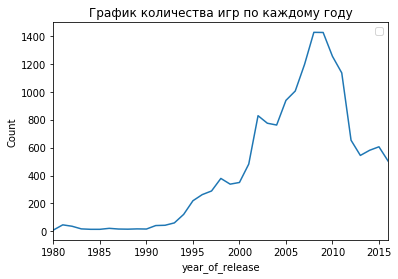

In [30]:
year = df.groupby('year_of_release').agg('count')
year.plot( y='name')
plt.ylabel('Count')
plt.title('График количества игр по каждому году')
plt.legend('')
plt.show()

До 2000-ых годов выпускалось слишком малое количество игр, поэтому для анализа будем брать определенный срез.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
<a id='platforms_research'></a>

In [31]:
sales_of_platform = df.groupby('platform')['sales'].sum()
display(sales_of_platform.sort_values(ascending=False).head())

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: sales, dtype: float64

In [32]:
top_platforms = ['PS2','X360','PS3','Wii','DS']
sales_of_platform = df.query('platform in @top_platforms and year_of_release > 1990')
sales_of_platform = sales_of_platform.groupby(['platform','year_of_release'])['sales'].sum()

In [33]:
display(sales_of_platform)

platform  year_of_release
DS        2004                17.27
          2005               130.14
          2006               119.81
          2007               146.94
          2008               145.31
          2009               119.54
          2010                85.02
          2011                26.18
          2012                11.01
          2013                 1.54
PS2       2000                39.17
          2001               166.43
          2002               205.38
          2003               184.31
          2004               211.81
          2005               160.66
          2006               103.42
          2007                75.99
          2008                53.90
          2009                26.40
          2010                 5.64
          2011                 0.45
PS3       2006                20.96
          2007                73.19
          2008               118.52
          2009               130.93
          2010               142.17
  

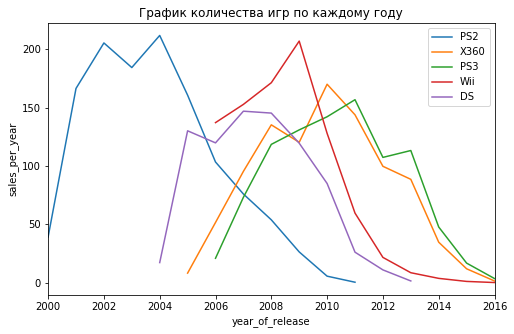

In [34]:
plt.rcParams["figure.figsize"] = [8,5]
sales_of_platform['PS2'].plot( y='sales', x='year_of_release')
sales_of_platform['X360'].plot( y='sales', x='year_of_release')
sales_of_platform['PS3'].plot( y='sales', x='year_of_release')
sales_of_platform['Wii'].plot( y='sales', x='year_of_release')
sales_of_platform['DS'].plot( y='sales', x='year_of_release')
plt.ylabel('sales_per_year')
plt.title('График количества игр по каждому году')
plt.legend(top_platforms)
plt.show()

Судя по графику, средняя продолжительность жизни платформы около 10 лет. При этом резкий спад продаж обычно приходиться на последние 3 года. При этом пиковые значения продаж обычно приходятся на середину жизни платформы, то есть примерно на 5-ый год.

За актуальный период возьмем все, что новее 2013 года, предполагая, что в этот год произошла смена поколений у основных платформ.

"Срежем" все данные, которые не попадают под выбранный актуальный период.
<a id='platforms_sales'></a>

In [35]:
dfq = df.query('year_of_release > 2012')

In [36]:
sales_of_platform = dfq.groupby(['platform','year_of_release'])['sales'].sum()
sales_of_platform = sales_of_platform.reset_index()

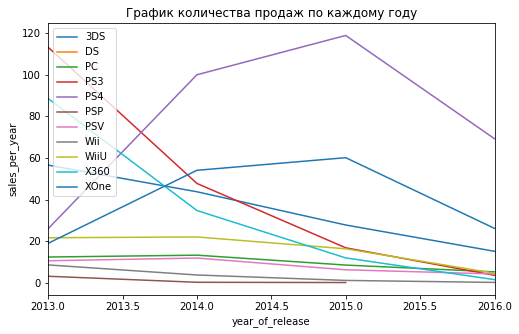

In [37]:
sales_of_platform.pivot_table(index='year_of_release',values='sales',columns='platform').plot()
plt.ylabel('sales_per_year')
plt.title('График количества продаж по каждому году')
plt.legend(loc=2)
plt.show()

Лидирующие 2 платформы: PS4 и XOne, но обе, кажется, прошли свой пик и уже идут к снижению в продажах. Причем, на графике ни одна из платформ не растет!

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


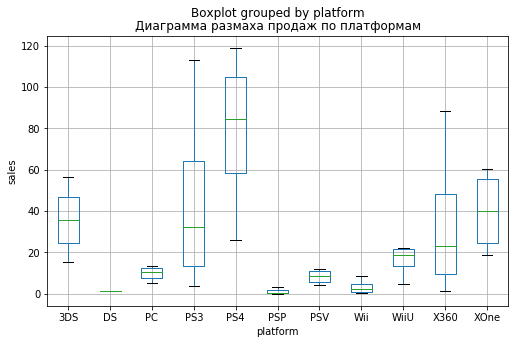

In [38]:
sales_of_platform.boxplot(by='platform', column='sales') 
plt.ylabel('sales')
plt.title('Диаграмма размаха продаж по платформам')
plt.show()

Судя по диаграмме размаха домириуют платформы PS3, PS4, X360. В числе догоняющих 3DS и XOne.

Хотя и кажется, что PS3 лидирует, у этой платформы слишком низко 1-ый квартиль, что означает, что платформа сильно теряет в продажах, что и отражалось в графике выше. С X360 та же ситуация.

Явным лидером выходит PS4, а также очень перспективными выглядят XOne и 3DS.

##### Посмотрим, как влияют на продажи внутри одной популярной платформы

Например PS4, отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
<a id='corr'></a>

In [39]:
PS3_dfq = dfq.query('platform == "PS4" and sales <=10')

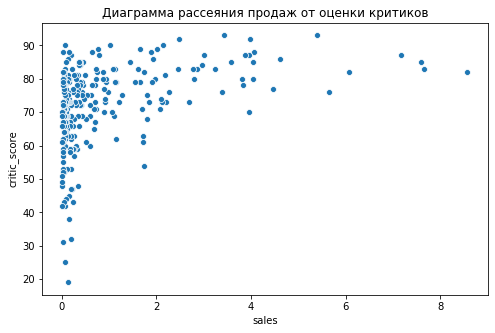

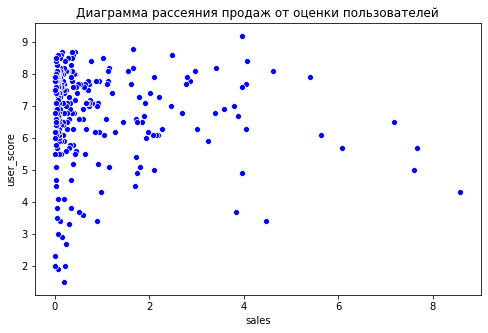

In [40]:
sns.scatterplot(x="sales", y="critic_score",data=PS3_dfq)
plt.title('Диаграмма рассеяния продаж от оценки критиков')
#plt.rcParams["figure.figsize"] = [7,4]
plt.show()
sns.scatterplot(x="sales", y="user_score",data=PS3_dfq, color = 'b')
#plt.rcParams["figure.figsize"] = [7,4]
plt.title('Диаграмма рассеяния продаж от оценки пользователей')
plt.show()

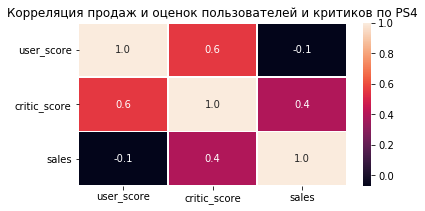

In [41]:
plt.rcParams["figure.figsize"] = [6,3]
sns.heatmap(PS3_dfq[['user_score','critic_score','sales']].corr(), annot=True, fmt=".1f", linewidths=.5)
plt.title('Корреляция продаж и оценок пользователей и критиков по PS4')
plt.show()

Между продажами и оценками критиков есть положительная корреляция, причем средняя.

А вот оценки пользователей, похоже, никак не влияют на продажи игр.

Из этого исходит вывод о том, что лучше целить на критиков, нежели на пользователей.

Посмотрим также на корреляцию не по конкретной платформе, а по всем платформам в целом.

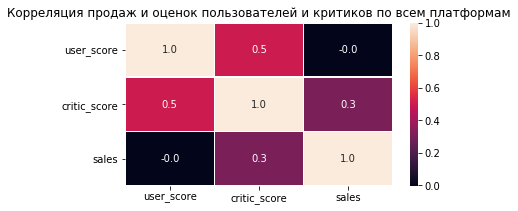

In [42]:
sns.heatmap(dfq[['user_score','critic_score','sales']].corr(), annot=True, fmt=".1f", linewidths=.5)
plt.title('Корреляция продаж и оценок пользователей и критиков по всем платформам')
plt.show()

Результаты очень близки к тому, что мы обнаружили ранее, значит наши выводы вполне можно считать правдивыми.

##### Посмотрим на общее распределение игр по жанрам.
<a id='genres'></a>

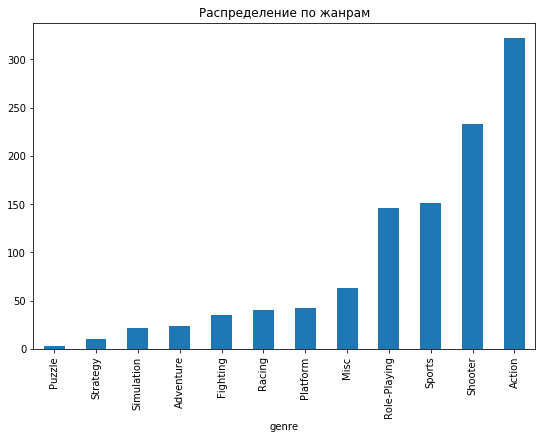

In [43]:
plt.rcParams["figure.figsize"] = [9,6]
genre = dfq.groupby('genre')['sales'].sum().sort_values()
genre.plot(kind='bar')
plt.title('Распределение по жанрам')
plt.show()

Пойдем немного дальше и посмотрим на распределение по платформам

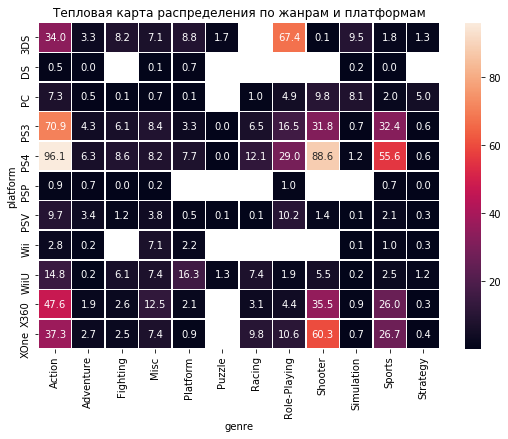

In [44]:
platform_genre_sales = dfq.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='sales', 
                        aggfunc=sum).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)
#plt.rcParams["figure.figsize"] = [9,6]
plt.title('Тепловая карта распределения по жанрам и платформам')
plt.show()

Самые прибыльные жанры, очевидно, оказались **Action** и **Shooter**. В этих жанрах преобладают платформы PS3, X360, PS4, 3DS и XOne. При этом платформа 3DS сильно обгоняет остальных в жанре Role-Playing и Platform, хотя и цифры значительно меньше чем у лидирующих жанров.

### Вывод
<a id='Вывод_3'></a>

Актуальными играми для анализа мы взяли те игры, которые вышли после **2010** года. Также был найден примерный срок жизни платформ: около 10 лет, причем, лучшие продажи приходятся на середину их срока жизни. Исходя из этого, самые актуальные платформы оказались: **XOne, PS4, 3DS.**

Также удалось выяснить, что между оценками пользователей, критиков и прожадами существет средняя корреляция, при этом корреляция между оценкой пользователей и продажами больше и близка с сильной.

Самые прибыльные жанры: **Action** и **Shooter** на платформах PS4 и XOne, а жанры **Role-Playing** и **Platform** на платформе 3DS.

### Шаг 4. Состовление портрета пользователя каждого региона. 
<a id='Шаг_4'></a>

Ход работы: 
- [Топ5 платформ по количеству игр и их продажам](#top5_games)
- [Топ5 жанров по продажам](#top5_genres)
- [Исследование влияния рейтинга на продажи](#rating)
- [Вывод](#Вывод_4)

#####  Определим для каждого из регионов топ5 платформ по количеству игр и их продажам.
<a id='top5_games'></a>

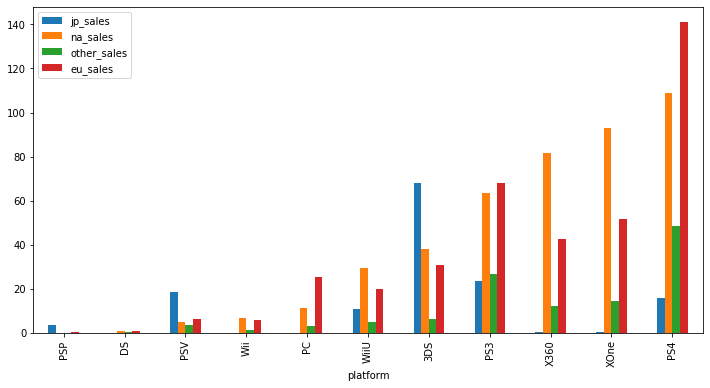

In [45]:
sales_dfq = dfq[['jp_sales','na_sales','other_sales','eu_sales','platform']]
plt.rcParams["figure.figsize"] = [12,6]
sales_dfq.groupby('platform').sum().sort_values(by='na_sales').plot(kind='bar')
plt.show()

In [46]:
d = {'na':['PS4','XOne','X360','PS3','3DS'],
     'eu':['PS4','PS3','X360','XOne','3DS'],
     'jp':['3DS','PS3','PSV','PS4','WiiU'],
     'other':['PS4','PS3','XOne','X360','3DS']}
table = pd.DataFrame(data=d)
table.index+=1
display(table)

,na,eu,jp,other
1,PS4,PS4,3DS,PS4
2,XOne,PS3,PS3,PS3
3,X360,X360,PSV,XOne
4,PS3,XOne,PS4,X360
5,3DS,3DS,WiiU,3DS


В таблце собраны топ 5 платформ по количеству продаж для каждого из регионов. 

Из интересного:
* Японцы очень любят платформу `3DS` и платформы от компании Sony.
* PS4 популярна среди всех стран.
* PS3 и X360 все еще пользуются спросом, хоть он и стремительно падает
* XOne явно менее успешна чем PS4

##### Сделаем такой же топ, только для разных жанров.
<a id='top5_genres'></a>

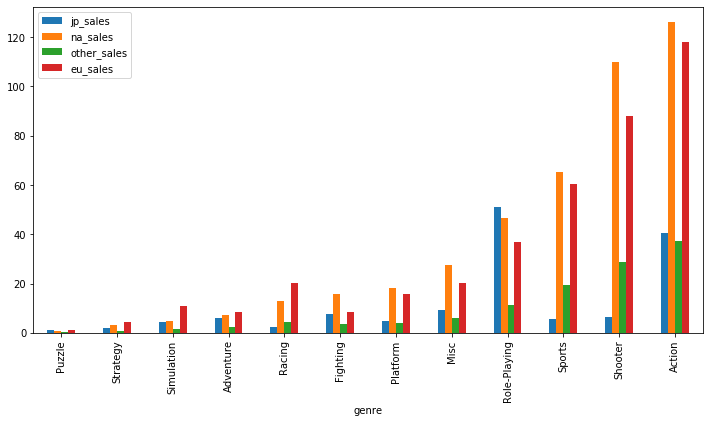

In [47]:
sales_dfq = dfq[['jp_sales','na_sales','other_sales','eu_sales','genre']]
sales_dfq.groupby('genre').sum().sort_values(by='na_sales').plot(kind='bar')
plt.show()

In [48]:
d = {'na':['Action','Shooter','Sports','Role-Playing','Misc'],
     'eu':['Action','Shooter','Sports','Role-Playing','Racing'],
     'jp':['Role-Playing','Action','Misc','Fighting','Platform'],
     'other':['Action','Shooter','Sports','Role-Playing','Misc']}
table = pd.DataFrame(data=d)
table.index+=1
display(table)

,na,eu,jp,other
1,Action,Action,Role-Playing,Action
2,Shooter,Shooter,Action,Shooter
3,Sports,Sports,Misc,Sports
4,Role-Playing,Role-Playing,Fighting,Role-Playing
5,Misc,Racing,Platform,Misc


В таблце собраны топ 5 жанров по количеству продаж для каждого из регионов. 

Из интересного:
* Все регионы очень похожи за исключением Японии. 
* Доминируют, очевидно, **Action**, **Shooter**, **Sports** и **Role-Playing**. Последний выглядит особенно выгодно, так как является самым популярным в Японии.

##### Посмотрим как рейтинг игр влияет на их продажи в разных регионах.
<a id='rating'></a>

In [49]:
dfq['rating'].value_counts()

undefined    977
M            369
T            333
E            302
E10+         252
Name: rating, dtype: int64

Распределение игр по рейтингу примерно равно, кроме E10+, поэтому их можно сравнивать.

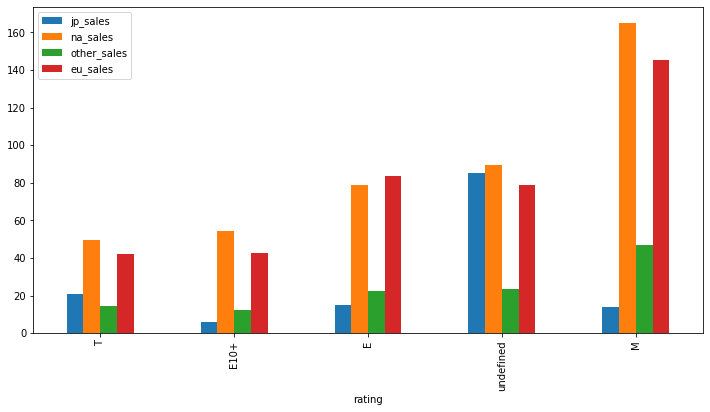

In [50]:
rating_dfq = dfq[['jp_sales','na_sales','other_sales','eu_sales','rating']]
rating_dfq = rating_dfq.query('rating !="RP" and rating!="EC"') # Отбросим 2 значения с рейтингами RP и EC
rating_dfq.groupby('rating').sum().sort_values(by='na_sales').plot(kind='bar')
plt.show()

Рейтинг влияет на продажи игр внутри одного региона. Причем, распределение снова похожи во всех странах, кроме Японии.

### Вывод
<a id='Вывод_4'></a>

Япония:
* Платформы: 3DS, PSV, PS3
* Жанры: Role-Playing, Action, Misc
* Рейтинг: E, T

Северная Америка:
* Платформы: PS4, XOne, X360
* Жанры: Action, Shooter, Sports
* Рейниг: M

Европа: 
* Платформы: PS4, PS3, X360
* Жанры: Action, Shooter, Sports
* Рейтинг: M

Другие страны:
* Платформы: PS4, PS3, XOne
* Жанры: Action, Shooter, Sports
* Рейтинг: M

### Шаг 5. Проверка гепотез. 
<a id='Шаг_5'></a>

Ход работы: 
- [Гепотеза об оценках пользователей XOne и PC](#XOne_PC)
- [Гепотеза об оценках пользователей Action и Sports](#Action_Sports)
- [Исследование влияния рейтинга на продажи](#rating)
- [Вывод](#Вывод_5)

##### Сформулируем первую гепотезу о рейтингах пользователей на платформах XOne и PC.
<a id='XOne_PC'></a>

**Нулевая гепотеза**: средний рейтинг пользователей на платформах XOne и PC одинаков.

**Альтернативная гепотеза**: средний рейтинг пользователей на платформах XOne и PC не равен.

Проверим эту гепотезу статистически, проведя t-тестирование.

In [51]:
alpha = 0.01 # критический уровень статистической значимости (возьмем с запасом, всего 1%)

Запишем срезы для каждой платформы в разные переменные, а также уберем все строки с пустыми значениями.

In [52]:
data_PC = dfq.query('platform == "PC"')
data_PC = data_PC[data_PC['user_score'].notna()]
data_XOne= dfq.query('platform == "XOne"')
data_XOne = data_XOne[data_XOne['user_score'].notna()]

Проверим разность дисперсий выборок

In [53]:
print(np.var(data_PC['user_score']))
print(np.var(data_XOne['user_score']))

3.016306347554631
1.8965188383045526


Дисперсии отличаются, учтем это при t-тестировании

In [54]:
results = st.ttest_ind(data_PC['user_score'],
                      data_XOne['user_score'],
                      equal_var = False)            # Дисперсии будут разные, так как мы берем данные из разных платформ

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):                    # Проверяем если p-value меньше критического уровня
    print("Отвергаем нулевую гипотезу")       
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


p-значение достаточно велико, значит наша нулевая гепотеза статистически значима.

##### Сформулируем первую гепотезу о рейтингах пользователей о жарнах Action и  Sports.
<a id='Action_Sports'></a>

**Нулевая гепотеза**: средний рейтинг пользователей жанров Action и Sports одинаков.

**Альтернативная гепотеза**: средний рейтинг пользователей жанров Action и Sports не равен.

Проверим эту гепотезу статистически, проведя t-тестирование.

Запишем срезы для каждой платформы в разные переменные, а также уберем все строки с пустыми значениями. Критическое значение оставим также 1%

In [55]:
data_Action = dfq.query('genre == "Action"')
data_Action = data_Action[data_Action['user_score'].notna()]
data_Sports= dfq.query('genre == "Sports"')
data_Sports = data_Sports[data_Sports['user_score'].notna()]

Перед тестом, проверяем дисперсии выборок.

In [56]:
print(np.var(data_Action['user_score']))
print(np.var(data_Sports['user_score']))

1.7648124186332366
3.160733984375


Дисперсии отличаются, учтем это при t-тестировании

In [57]:
results = st.ttest_ind(data_Action['user_score'],
                      data_Sports['user_score'],
                      equal_var = False)            # Дисперсии будут разные, так как мы берем данные из разных платформ

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):            # Проверяем если p-value меньше критического уровня
    print("Отвергаем нулевую гипотезу")       
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нулевая гепотеза отвергнута, по p-значению, тогда берем во внимание альтернативную!

### Вывод
<a id='Вывод_5'></a>

Первая нулевая гепотеза не была отвергнута, во второй гепотезе мы взяли во внимание альтернативную, значит есть основания верить, что средние оценки пользователей по платформам PC и XOne приблизительно равны ,и что средние оценки пользователей по жанрам Action и Sports неравны. 

### Шаг 6. Общий вывод. 
<a id='Шаг_6'></a>

По итогам анализа, можно сделать следующие рекомендации по выявлению потенциально популярного продукта и корректировки для отдела маркетинга:
* Так как средняя продолжительность жизни платформы около 10 лет, а пик продаж приходиться на 5-ый год, то целесообразно выбирать современные платформы: **PS4, XOne, 3DS.**
* Глобально доминируют жанры: **Action, Shooter, Role-Playing, Sports**
* Также глобально рейтинг **M** самый продаваемый.
* На продажи игры средне влияют оценки критиков и почти сильно влияют оценки пользователей
* Успех игры зависит от локализации игры.
 * Для Японии популярна платформа **3DS**, жанры **Role-Playing** и **Action**, рейтинги **E, T**
 * Для Северной Америки Европы и других платформа **PS4**, жанры **Action, Shooter**, рейтинг **M**
